In [31]:
import pandas as pd
import math
import os
import conda
import matplotlib.pyplot as plt
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [32]:
df = pd.read_csv('./house_sale_data_with_geocodes.csv')

In [33]:
df = df.dropna()

In [34]:
df['sell_date'] = pd.to_datetime(df['sell_date'],format='%d-%m-%Y')

In [35]:
df.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,zip_code_num,long,lat
0,"Ved Volden 5, 5. TV",1425 København K,4000000,2017-05-23,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,1425,12.593629,55.671769
1,"Rådhusstræde 4C, 1",1466 København K,4895000,2017-05-18,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,1466,12.573689,55.676839
2,"Store Kongensgade 112A, 3",1264 København K,250000,2017-05-15,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,1264,12.590441,55.687079
3,"Amaliegade 13G, 2",1256 København K,7375000,2017-05-15,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,1256,12.591287,55.683439
4,"Borgergade 144, 3. TH",1300 København K,5825000,2017-05-10,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,1300,12.588744,55.687623


### Create a plot with the help of Basemap, on which you plot sales records for 2015 which are not farther away than 50km from Copenhagen city center (lat: 55.676111, lon: 12.568333)

In [36]:
def haversine_distance(origin, destination):

    lat_orig, lon_orig = origin
    lat_dest, lon_dest = destination
    radius = 6371

    dlat = math.radians(lat_dest-lat_orig)
    dlon = math.radians(lon_dest-lon_orig)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat_orig)) 
        * math.cos(math.radians(lat_dest)) * math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [37]:
mask_2015 = (df['sell_date'].dt.year == 2015 ) 

In [38]:
df_2015 = df[mask_2015]

In [39]:
df.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,zip_code_num,long,lat
0,"Ved Volden 5, 5. TV",1425 København K,4000000,2017-05-23,Alm. Salg,43956.0,3.0,Lejlighed,91.0,1938.0,0.0,1425,12.593629,55.671769
1,"Rådhusstræde 4C, 1",1466 København K,4895000,2017-05-18,Alm. Salg,46619.0,3.0,Lejlighed,105.0,1796.0,0.0,1466,12.573689,55.676839
2,"Store Kongensgade 112A, 3",1264 København K,250000,2017-05-15,Andet,1851.0,2.0,Lejlighed,135.0,1860.0,0.0,1264,12.590441,55.687079
3,"Amaliegade 13G, 2",1256 København K,7375000,2017-05-15,Alm. Salg,75255.0,3.0,Lejlighed,98.0,1948.0,9.0,1256,12.591287,55.683439
4,"Borgergade 144, 3. TH",1300 København K,5825000,2017-05-10,Alm. Salg,57673.0,3.0,Lejlighed,101.0,1854.0,3.0,1300,12.588744,55.687623


In [40]:
df_2015['dist_2_cph'] = df_2015.apply(lambda row : haversine_distance((row['lat'],row['long']),(55.676111, 12.568333)), axis=1)


In [41]:
df_2015.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,zip_code_num,long,lat,dist_2_cph
959,"Strandgade 44D, 3",1401 København K,1658000,2015-12-31,Fam. Salg,21256.0,2.0,Lejlighed,78.0,1700.0,0.0,1401,12.592139,55.674963,1.498095
960,"Sankt Peders Stræde 25, 4",1453 København K,5450000,2015-12-30,Alm. Salg,43600.0,4.0,Lejlighed,125.0,1816.0,-4.0,1453,12.569491,55.679205,0.351614
961,"Overgaden Neden Vandet 5A, 2. TV",1414 København K,4107000,2015-12-30,Alm. Salg,37000.0,3.0,Lejlighed,111.0,1995.0,0.0,1414,12.588321,55.671338,1.361057
962,"Overgaden Neden Vandet 5A, 2. TH",1414 København K,3811000,2015-12-30,Alm. Salg,37000.0,3.0,Lejlighed,103.0,1995.0,0.0,1414,12.588321,55.671338,1.361057
963,"Galionsvej 1F, 2. 29",1437 København K,8500000,2015-12-30,Alm. Salg,60714.0,3.0,Lejlighed,140.0,1952.0,0.0,1437,12.606322,55.678720,2.399416


In [42]:
mask_dist_smaller_50 = (df_2015.dist_2_cph <= 50)  

In [43]:
distances = df_2015[mask_dist_smaller_50]

In [44]:
distances.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,zip_code_num,long,lat,dist_2_cph
959,"Strandgade 44D, 3",1401 København K,1658000,2015-12-31,Fam. Salg,21256.0,2.0,Lejlighed,78.0,1700.0,0.0,1401,12.592139,55.674963,1.498095
960,"Sankt Peders Stræde 25, 4",1453 København K,5450000,2015-12-30,Alm. Salg,43600.0,4.0,Lejlighed,125.0,1816.0,-4.0,1453,12.569491,55.679205,0.351614
961,"Overgaden Neden Vandet 5A, 2. TV",1414 København K,4107000,2015-12-30,Alm. Salg,37000.0,3.0,Lejlighed,111.0,1995.0,0.0,1414,12.588321,55.671338,1.361057
962,"Overgaden Neden Vandet 5A, 2. TH",1414 København K,3811000,2015-12-30,Alm. Salg,37000.0,3.0,Lejlighed,103.0,1995.0,0.0,1414,12.588321,55.671338,1.361057
963,"Galionsvej 1F, 2. 29",1437 København K,8500000,2015-12-30,Alm. Salg,60714.0,3.0,Lejlighed,140.0,1952.0,0.0,1437,12.606322,55.678720,2.399416


In [45]:
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap
%matplotlib notebook
fig = plt.figure(figsize=(4, 4))
m = Basemap(projection='lcc', resolution=None,
            width=2000000, height=2000000, 
            lat_0=55, lon_0=10,)
m.etopo(scale=1.0, alpha=0.5)
i = 0
for add,z_code,lat,long in zip(distances['address'],distances['zip_code'],distances['lat'],distances['long']):
    x, y = m(long,lat)
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x + 50000, y - 0,z_code, fontsize=8)  
    if i == 3:
        break
    i+=1    

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Mikkel\\Anaconda3\\share\\proj\\epsg'

### Use folium to plot the locations of the 1992 housing sales for the city centers of Copenhagen (zip code 1000-1499), Odense (zip code 5000), Aarhus (zip code 8000), and Aalborg (zip code 9000), see Assignment 2 onto a map.

In [46]:
import folium
from IPython.display import IFrame

In [47]:
mask_1992 = ((df.sell_date.dt.year == 1992)&
             ((df.zip_code_num == 5000)|
              (df.zip_code_num == 8000)|
              (df.zip_code_num == 9000)
             )
) 

In [48]:
df_1992 = df[mask_1992]
df_1992.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,zip_code_num,long,lat
611026,Bøgebjergvej 12,5000 Odense C,655000,1992-11-27,Alm. Salg,5413.0,4.0,Villa,121.0,1934.0,0.0,5000,10.392850,55.411877
611027,Windelsvej 37,5000 Odense C,640000,1992-11-25,Alm. Salg,4324.0,6.0,Villa,148.0,1935.0,0.0,5000,10.393368,55.416377
611028,Drejøgade 21,5000 Odense C,575000,1992-11-24,Alm. Salg,7012.0,3.0,Villa,82.0,1938.0,0.0,5000,10.398223,55.418960
611029,Vendersvej 29,5000 Odense C,350000,1992-11-14,Alm. Salg,4545.0,4.0,Villa,77.0,1948.0,0.0,5000,10.417827,55.410032
611030,Bøgebjergvej 5,5000 Odense C,376250,1992-11-11,Fam. Salg,2894.0,6.0,Villa,130.0,1923.0,0.0,5000,10.393447,55.411999


In [49]:
my_map = folium.Map(location=[55.88207495748612, 10.636574309440173], zoom_start=6)
for add,z_code,lat,long in zip(df_1992['address'],df_1992['zip_code'],df_1992['lat'],df_1992['long']):
    folium.CircleMarker(location=[lat, long], radius=2,popup=add+'\n '+z_code).add_to(my_map)
my_map.save('./large_flat_trades.html')   

In [50]:
IFrame(src='./large_flat_trades.html', width=700, height=600)

### Create a 2D plot, which compares prices per square meter (on the x-axis) and distance to Nørreport st. (y-axis) for all housing on Sjæland for the year 2005 and where the zip code is lower than 3000 and the price per square meter is lower than 80000Dkk. Describe in words what you can read out of the plot. Formulate a hypothesis on how the values on the two axis might be related.

In [51]:
mask_2005 = (
    (df.sell_date.dt.year == 2005)&
    (df.zip_code_num < 3000)&
    (df.price_per_sq_m < 80000)
)

In [52]:
df_2005 = df[mask_2005]

In [53]:
df_2005['dist_norre'] = df_2005.apply(lambda row : haversine_distance((row['lat'],row['long']),(55.683010, 12.571143)), axis=1)

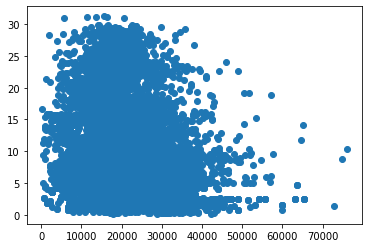

In [54]:
%matplotlib inline
plt.scatter(df_2005.price_per_sq_m,df_2005.dist_norre)

### From looking at the plot we can see that the further away you live from Nørreport St. the price per square meter is less
### So our hypothesis is: The further away you live from Nørreport St. the cheaper the price per square meter is

### Create a histogram (bar plot), which visualizes the frequency of house trades per zip code area corresponding to the entire dataset of housing sale records.

(array([ 38871., 229844., 133335., 123834., 129315., 101144., 130518.,
         96183., 182528., 116266.]),
 array([1050., 1944., 2838., 3732., 4626., 5520., 6414., 7308., 8202.,
        9096., 9990.]),
 <a list of 10 Patch objects>)

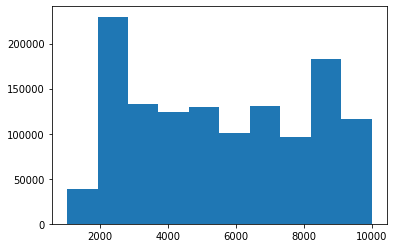

In [107]:
plt.hist(df.zip_code_num, bins=10)

### Create a cumulatve histogram, which visualizes the frequency of house trades per zip code area corresponding to the entire dataset of housing sale records and the vertical bars are colored to the frequency of rooms per sales record. That is, a plot similar to the following, where single rooms are in the bottom and two room frequencies on top, etc. See, http://matplotlib.org/1.3.0/examples/pylab\_examples/histogram\_demo\_extended.html for example.

(array([  38871.,  268715.,  402050.,  525884.,  655199.,  756343.,
         886861.,  983044., 1165572., 1281838.]),
 array([1050., 1944., 2838., 3732., 4626., 5520., 6414., 7308., 8202.,
        9096., 9990.]),
 <a list of 10 Patch objects>)

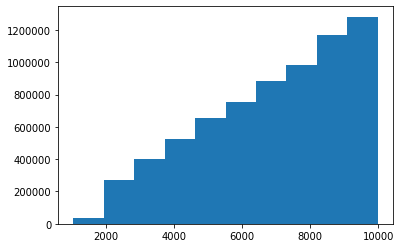

In [110]:
plt.hist(df.zip_code_num, cumulative=True)

### Now, you create a 3D histogram, in which you plot the frequency of house trades per zip code area as a 'layer' for every in the dataset, see http://matplotlib.org/examples/mplot3d/index.html for an example.

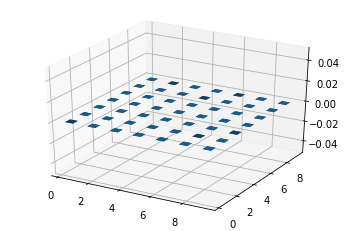

In [56]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(df.zip_code_num,df.zip_code_num,bins=7, range=[[0, 10], [0, 10]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

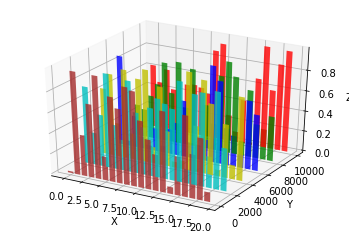

In [75]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y','c', 'brown'], [10000, 8000, 6000, 4000, 2000, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Freestyle Create a plot, which visualizes a fact hidden in the housing sales data, which you want to highlight to business people.